In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | pechenga
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mnogovershinnyy
Processing Record 5 of Set 1 | igrim
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | labuhan
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | port hedland
Processing Record 12 of Set 1 | lipin bor
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | juneau
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | guarapari
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ponta delgada
Proc

Processing Record 38 of Set 4 | buchanan
Processing Record 39 of Set 4 | airai
Processing Record 40 of Set 4 | shumskiy
Processing Record 41 of Set 4 | comodoro rivadavia
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | sabang
Processing Record 45 of Set 4 | aktash
Processing Record 46 of Set 4 | cabedelo
Processing Record 47 of Set 4 | makakilo city
Processing Record 48 of Set 4 | rezzato
Processing Record 49 of Set 4 | smithers
Processing Record 50 of Set 4 | paamiut
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | padang
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | beira
Processing Record 7 of Set 5 | bow island
Processing Record 8 of Set 5 | aquiraz
Processing Record 9 of Set 5 | miri
Processing Record 10 of Set 5 | abu samrah
Processing Record 11 of Set 5 | da lat
Processing R

Processing Record 30 of Set 8 | kushima
Processing Record 31 of Set 8 | ganzhou
Processing Record 32 of Set 8 | jhajjar
Processing Record 33 of Set 8 | luganville
Processing Record 34 of Set 8 | ongandjera
Processing Record 35 of Set 8 | khislavichi
Processing Record 36 of Set 8 | pangkalanbuun
Processing Record 37 of Set 8 | omboue
Processing Record 38 of Set 8 | cairns
Processing Record 39 of Set 8 | chitrakonda
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | pires do rio
Processing Record 42 of Set 8 | kirensk
Processing Record 43 of Set 8 | sept-iles
Processing Record 44 of Set 8 | burnie
Processing Record 45 of Set 8 | berbera
Processing Record 46 of Set 8 | oskemen
Processing Record 47 of Set 8 | lishu
Processing Record 48 of Set 8 | pevek
Processing Record 49 of Set 8 | shahr-e babak
Processing Record 50 of Set 8 | coyah
Processing Record 1 of Set 9 | bollnas
Processing Record 2 of Set 9 | gladstone
Processing Record 3 of Set 9 | brae
Processing Reco

Processing Record 16 of Set 12 | svetlogorsk
Processing Record 17 of Set 12 | dandong
Processing Record 18 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 19 of Set 12 | kangaatsiaq
Processing Record 20 of Set 12 | oussouye
Processing Record 21 of Set 12 | skibbereen
Processing Record 22 of Set 12 | nome
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | blagoveshchensk
Processing Record 25 of Set 12 | chanute
Processing Record 26 of Set 12 | rocha
Processing Record 27 of Set 12 | bathsheba
Processing Record 28 of Set 12 | san rafael
Processing Record 29 of Set 12 | ovalle
Processing Record 30 of Set 12 | araouane
Processing Record 31 of Set 12 | zhezkazgan
Processing Record 32 of Set 12 | robertson
Processing Record 33 of Set 12 | hadejia
Processing Record 34 of Set 12 | najran
Processing Record 35 of Set 12 | nam som
Processing Record 36 of Set 12 | kirchhain
Processing Record 37 of Set 12 | bandarbeyla
Processing Record 38 of Set 12 | mahebo

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,57.36,47,40,10.36,CA,2022-09-27 20:44:54
1,Pechenga,69.5259,31.1703,44.60,82,85,7.43,RU,2022-09-27 20:44:54
2,Ushuaia,-54.8000,-68.3000,53.22,61,20,37.98,AR,2022-09-27 20:44:54
3,Mnogovershinnyy,53.9353,139.9242,36.18,77,90,3.18,RU,2022-09-27 20:44:55
4,Igrim,63.1906,64.4162,26.78,89,59,6.44,RU,2022-09-27 20:44:55
5,Bluff,-46.6000,168.3333,49.80,88,77,4.83,NZ,2022-09-27 20:44:55
6,Labuhan,-6.8844,112.2051,76.23,79,36,9.22,ID,2022-09-27 20:44:56
7,Tasiilaq,65.6145,-37.6368,37.56,98,100,1.36,GL,2022-09-27 20:44:56
8,Norman Wells,65.2820,-126.8329,46.44,66,20,13.80,CA,2022-09-27 20:44:56
9,Port Hedland,-20.3167,118.5667,62.65,55,43,3.44,AU,2022-09-27 20:44:57


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-09-27 20:44:54,55.7435,-97.8558,57.36,47,40,10.36
1,Pechenga,RU,2022-09-27 20:44:54,69.5259,31.1703,44.60,82,85,7.43
2,Ushuaia,AR,2022-09-27 20:44:54,-54.8000,-68.3000,53.22,61,20,37.98
3,Mnogovershinnyy,RU,2022-09-27 20:44:55,53.9353,139.9242,36.18,77,90,3.18
4,Igrim,RU,2022-09-27 20:44:55,63.1906,64.4162,26.78,89,59,6.44
5,Bluff,NZ,2022-09-27 20:44:55,-46.6000,168.3333,49.80,88,77,4.83
6,Labuhan,ID,2022-09-27 20:44:56,-6.8844,112.2051,76.23,79,36,9.22
7,Tasiilaq,GL,2022-09-27 20:44:56,65.6145,-37.6368,37.56,98,100,1.36
8,Norman Wells,CA,2022-09-27 20:44:56,65.2820,-126.8329,46.44,66,20,13.80
9,Port Hedland,AU,2022-09-27 20:44:57,-20.3167,118.5667,62.65,55,43,3.44


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1664312811.571038

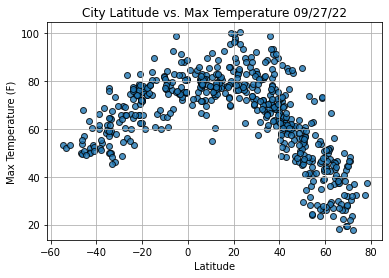

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

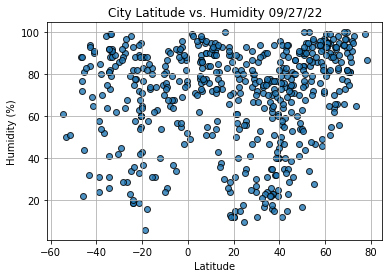

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

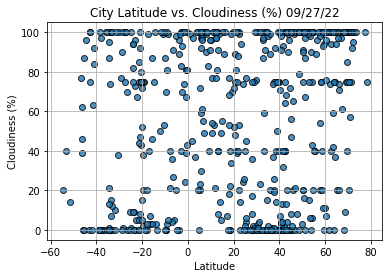

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

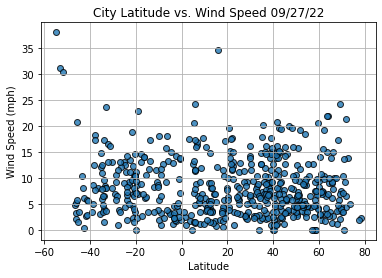

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()